<a href="https://colab.research.google.com/github/Gregory467/Colab/blob/main/%EC%A1%B8%EC%97%85%EB%B0%9C%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. library, data import

- MOKE :
PMA_8, PMA_10, PMA_12
- AHE : data, data2, data3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

# MOKE
f =  '/content/gdrive/MyDrive/data1/pma_79.txt'

#AHE
f2 =  '/content/gdrive/MyDrive/data1/PtCoPt_pma_anamolous_hall1.txt'
f3 =  '/content/gdrive/MyDrive/data1/PtCoPt_pma_anamolous_hall2.txt'

data = np.loadtxt(f)
data2 = np.loadtxt(f2)
data3 = np.loadtxt(f3)

# MOKE
f1 =  '/content/gdrive/MyDrive/data1/PtCoPt_pma_0.8_3.txt'
f2 =  '/content/gdrive/MyDrive/data1/PtCoPt_pma_1.0_3.txt'
f3 =  '/content/gdrive/MyDrive/data1/PtCoPt_pma_1.2_3.txt'

PMA_8 = np.loadtxt(f1)
PMA_10 = np.loadtxt(f2)
PMA_12 = np.loadtxt(f3)

Mounted at /content/gdrive


In [3]:
# Install the SciencePlots package
!pip install SciencePlots

In [4]:
# Apply the 'science' style from SciencePlots
import scienceplots

plt.style.use(['science','no-latex'])

# 2. PMA_Moke

 - Co(0.8) : x1, y1
 - Co(1.0) : x2, y2
 - Co(1.2) : x3, y3

In [5]:
x1 = [point[0] for point in PMA_8]
y1 = [point[1] for point in PMA_8]

x2 = [point[0] for point in PMA_10]
y2 = [point[1] for point in PMA_10]

x3 = [point[0] for point in PMA_12]
y3 = [point[1] for point in PMA_12]

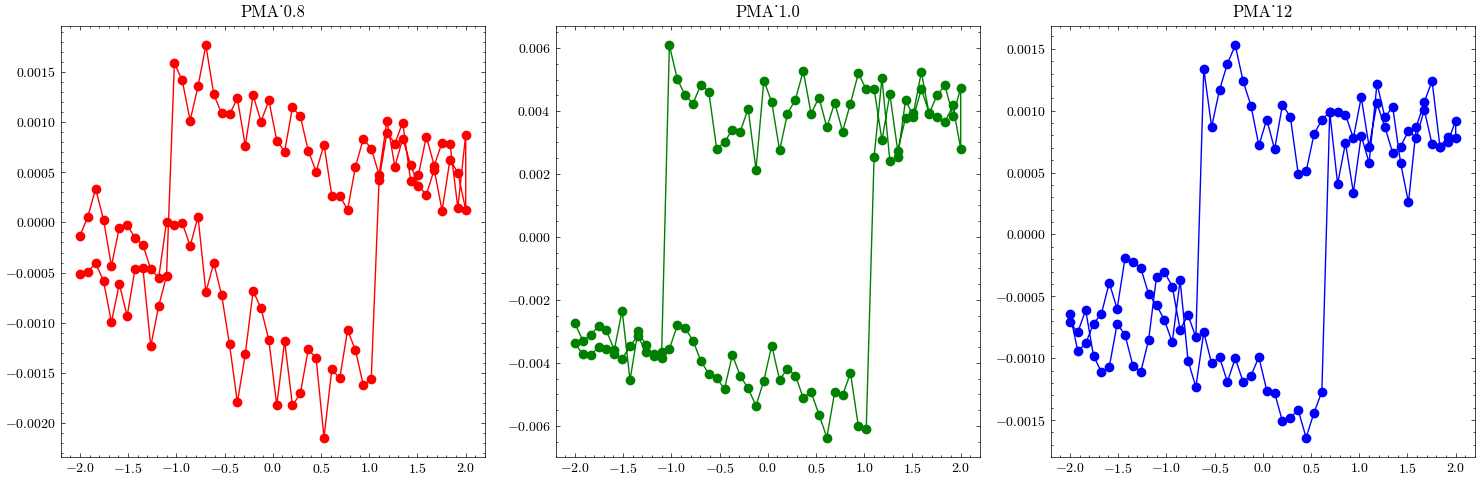

In [6]:
# 3개의 subplot 생성
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# 각 subplot에 데이터 플로팅
ax1.plot(x1, y1, 'ro-')
ax1.set_title('PMA_0.8')

ax2.plot(x2, y2 , 'go-')
ax2.set_title('PMA_1.0')

ax3.plot(x3, y3, 'bo-')
ax3.set_title('PMA_12')

# 전체 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

# 3. AHE

- Co(0.8) : col1_3, col2_3  
-  Co(1.0) :col1_3, col3_3
-  Co(1.2) :col1_3, col4_3_redorder

In [7]:
# 흘려주는 DAQ voltage
DAQ_voltage = 1

# film resistance
R_1_2 = 300
R_1 = 285.3
R_0_8 = 262.7

# Input current
I_1_2 = DAQ_voltage / R_1_2
I_1 = DAQ_voltage / R_1
I_0_8 =  DAQ_voltage/ R_0_8

In [8]:
# Extract columns , calculate hall resistance
col1_2 = data2[:, 0]
col2_2 = data2[:, 1] / I_0_8
col3_2 = data2[:, 2] / I_1
col4_2 = data2[:, 3] / I_1_2

col1_3 = data3[:, 0]
col2_3 = data3[:, 1] / I_0_8
col3_3 = data3[:, 2] / I_1
col4_3 = data3[:, 3] / I_1_2

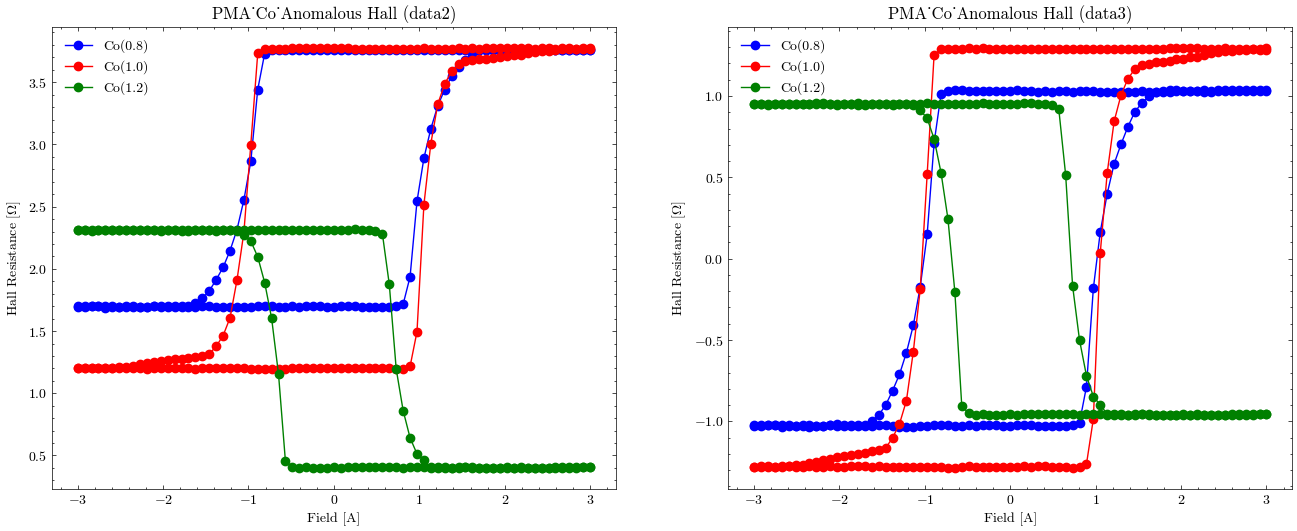

In [9]:
# Plot the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(col1_2, col2_2, 'bo-', label='Co(0.8)')
ax1.plot(col1_2, col3_2, 'ro-', label='Co(1.0)')
ax1.plot(col1_2, col4_2, 'go-', label='Co(1.2)')
ax1.set_xlabel('Field [A]')
ax1.set_ylabel('Hall Resistance [$\Omega$]')
ax1.set_title('PMA_Co_Anomalous Hall (data2)')
ax1.legend()

ax2.plot(col1_3, col2_3, 'bo-', label='Co(0.8)')
ax2.plot(col1_3, col3_3, 'ro-', label='Co(1.0)')
ax2.plot(col1_3, col4_3, 'go-', label='Co(1.2)')
ax2.set_xlabel('Field [A]')
ax2.set_ylabel('Hall Resistance [$\Omega$]')
ax2.set_title('PMA_Co_Anomalous Hall (data3)')
ax2.legend()

plt.show()

## 1. reorder 함수, class, plot

In [10]:
# 함수 정의
def reorder_array(col4):
    # Calculate the midpoint
    x = int(len(col4) / 2)

    # Split the array
    col4_reverse1 = col4[:x]
    col4_reverse2 = col4[x:]

    # Reverse both parts
    col4_reverse1 = np.flip(col4_reverse1)
    col4_reverse2 = np.flip(col4_reverse2)

    # Concatenate the reversed parts
    col4_reorder = np.concatenate([col4_reverse1, col4_reverse2])

    return col4_reorder

In [11]:
# reorder
col4_2_reorder = reorder_array(col4_2)
col4_3_reorder = reorder_array(col4_3)

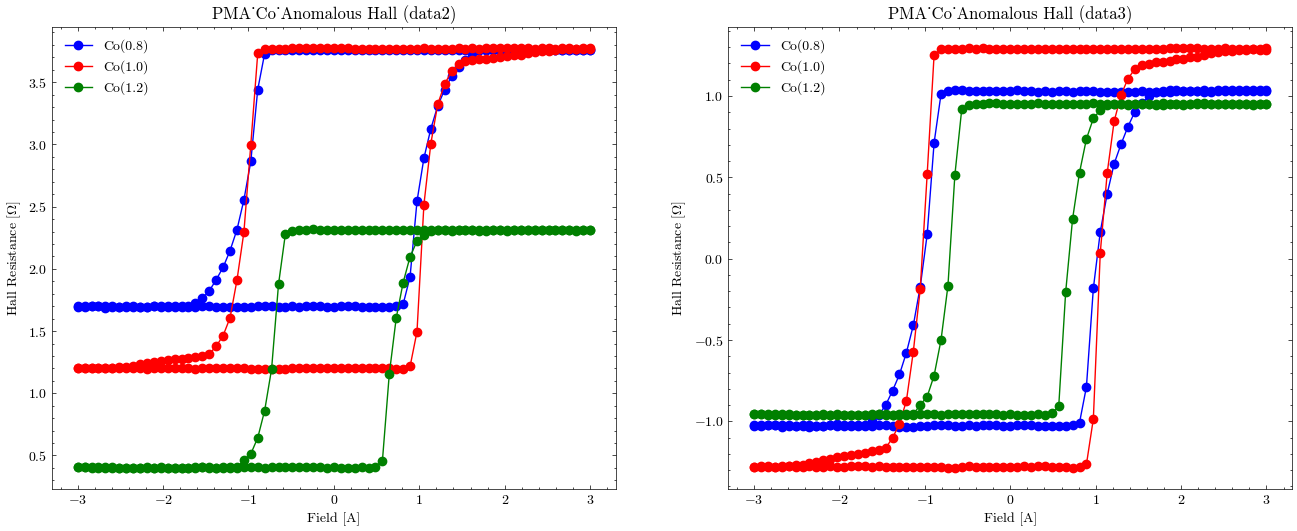

In [12]:
# Plot the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(col1_2, col2_2, 'bo-', label='Co(0.8)')
ax1.plot(col1_2, col3_2, 'ro-', label='Co(1.0)')
ax1.plot(col1_2, col4_2_reorder, 'go-', label='Co(1.2)')
ax1.set_xlabel('Field [A]')
ax1.set_ylabel('Hall Resistance [$\Omega$]')
ax1.set_title('PMA_Co_Anomalous Hall (data2)')
ax1.legend()

ax2.plot(col1_3, col2_3, 'bo-', label='Co(0.8)')
ax2.plot(col1_3, col3_3, 'ro-', label='Co(1.0)')
ax2.plot(col1_3, col4_3_reorder, 'go-', label='Co(1.2)')
ax2.set_xlabel('Field [A]')
ax2.set_ylabel('Hall Resistance [$\Omega$]')
ax2.set_title('PMA_Co_Anomalous Hall (data3)')
ax2.legend()

plt.show()

# 4. Image

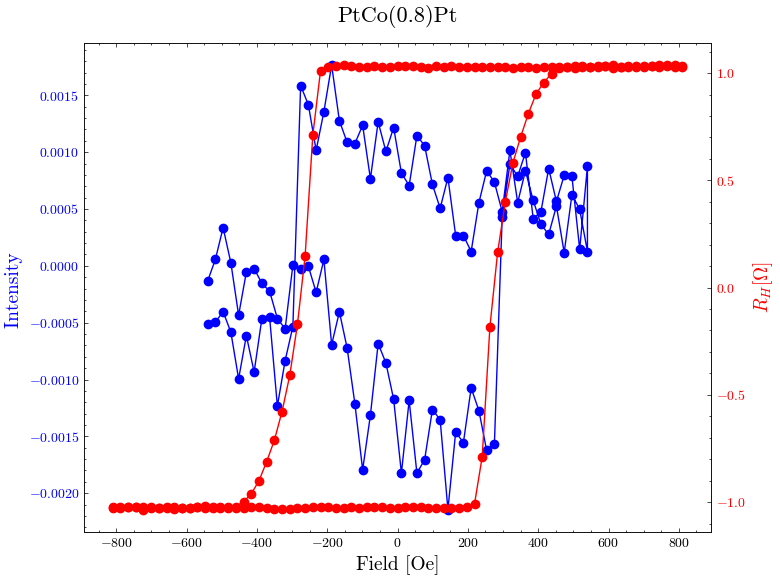

In [13]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE with scaled x-axis
ax1.plot([x * 270 for x in x1], y1, 'bo-', label='MOKE')
ax1.set_xlabel('Field [Oe]', fontsize= 14)  # Changed unit to Oe since we multiplied by 90
ax1.set_ylabel('Intensity ', color='blue', fontsize= 14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for AHE with scaled x-axis
ax2 = ax1.twinx()
ax2.plot([x * 270 for x in col1_3], col2_3, 'ro-', label='AHE')
ax2.set_ylabel('$R_H [\Omega]$', color='red', fontsize= 14)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and show the plot
plt.title('PtCo(0.8)Pt', fontsize= 16, pad=15)
fig.tight_layout()
plt.show()

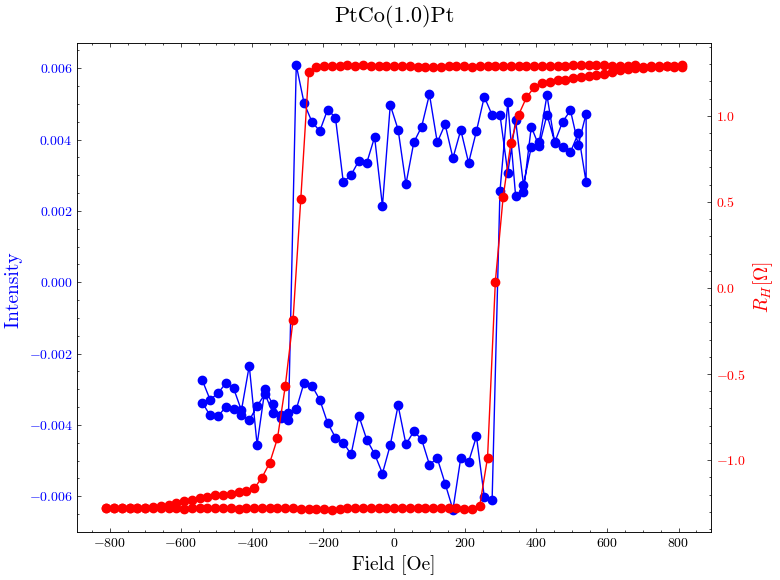

In [14]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE
ax1.plot([x * 270 for x in x2], y2, 'bo-', label='MOKE')
ax1.set_xlabel('Field [Oe]', fontsize= 14)
ax1.set_ylabel('Intensity ', color='blue', fontsize= 14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for AHE
ax2 = ax1.twinx()
ax2.plot([x * 270 for x in col1_3], col3_3, 'ro-', label='AHE')
ax2.set_ylabel('$R_H [\Omega] $', color='red', fontsize= 14)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and show the plot
plt.title('PtCo(1.0)Pt', fontsize= 16, pad=15)
fig.tight_layout()
plt.show()

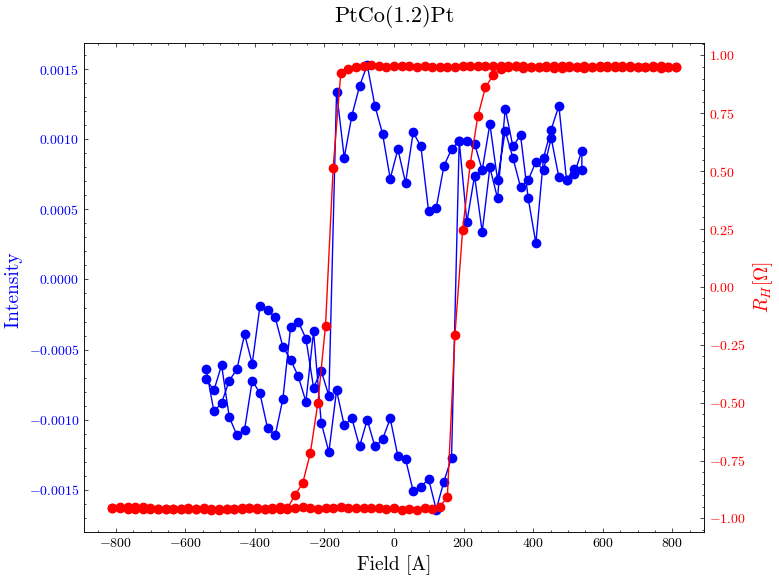

In [15]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE
ax1.plot([x * 270 for x in x3], y3, 'bo-', label='MOKE')
ax1.set_xlabel('Field [A]', fontsize= 14)
ax1.set_ylabel('Intensity ', color='blue', fontsize= 14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for AHE
ax2 = ax1.twinx()
ax2.plot([x * 270 for x in col1_3], col4_3_reorder, 'ro-', label='AHE')
ax2.set_ylabel('$R_H [\Omega] $', color='red', fontsize= 14)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and show the plot
plt.title('PtCo(1.2)Pt', fontsize= 16, pad=15)
fig.tight_layout()
plt.show()

# 5. 최종 이미지

## MOKE(0.8)

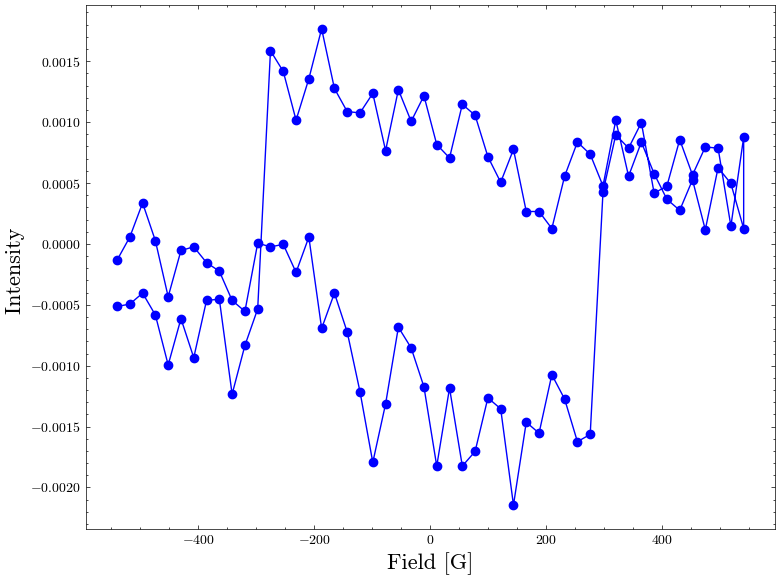

In [16]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE
ax1.plot([x* 270 for x in x1], y1, 'bo-', label='MOKE')
ax1.set_xlabel('Field [G]', fontsize= 16)
ax1.set_ylabel('Intensity ', fontsize= 16)


fig.tight_layout()
plt.show()

## MOKE(1.0)

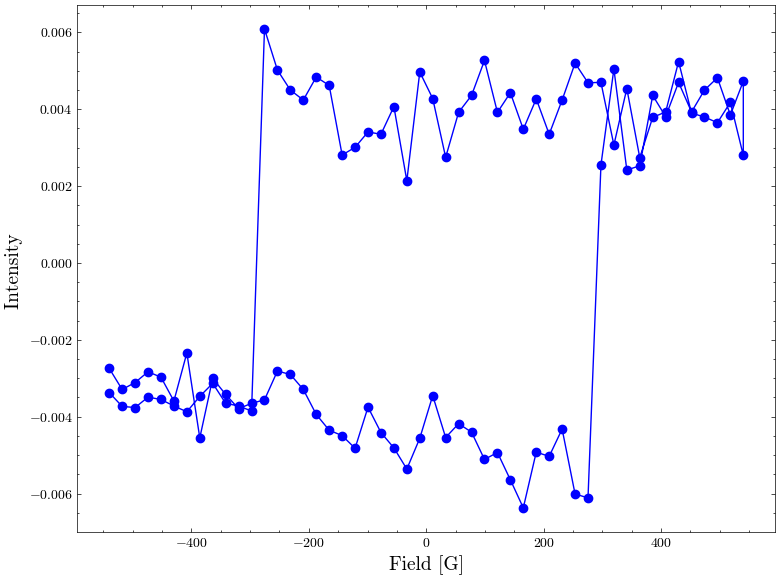

In [17]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE
ax1.plot([x* 270 for x in x2], y2, 'bo-', label='MOKE')
ax1.set_xlabel('Field [G]', fontsize= 14)
ax1.set_ylabel('Intensity ', fontsize= 14)

fig.tight_layout()
plt.show()

## MOKE(1.2)

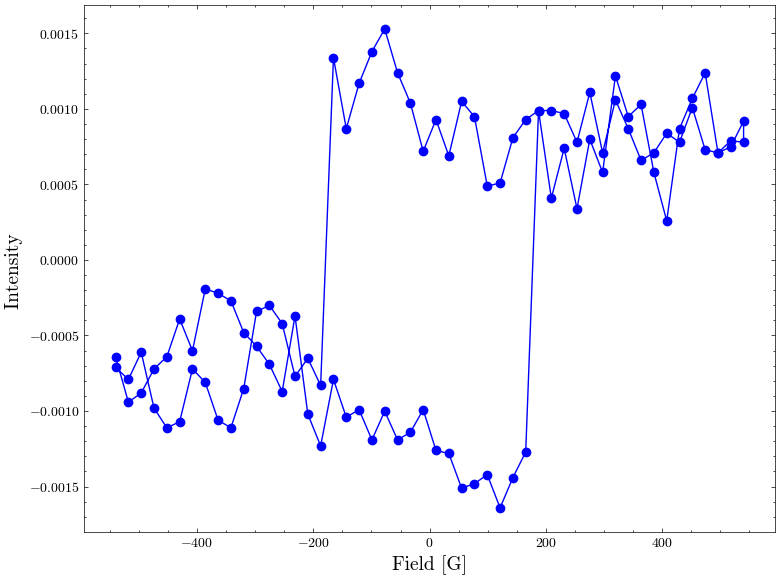

In [18]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE
ax1.plot([x* 270 for x in x3], y3, 'bo-', label='MOKE')
ax1.set_xlabel('Field [G]', fontsize= 14)
ax1.set_ylabel('Intensity ', fontsize= 14)

fig.tight_layout()
plt.show()

## AHE(0.8)

- x 값 : x*270 for x in col1_3
- y 값 : col2_3

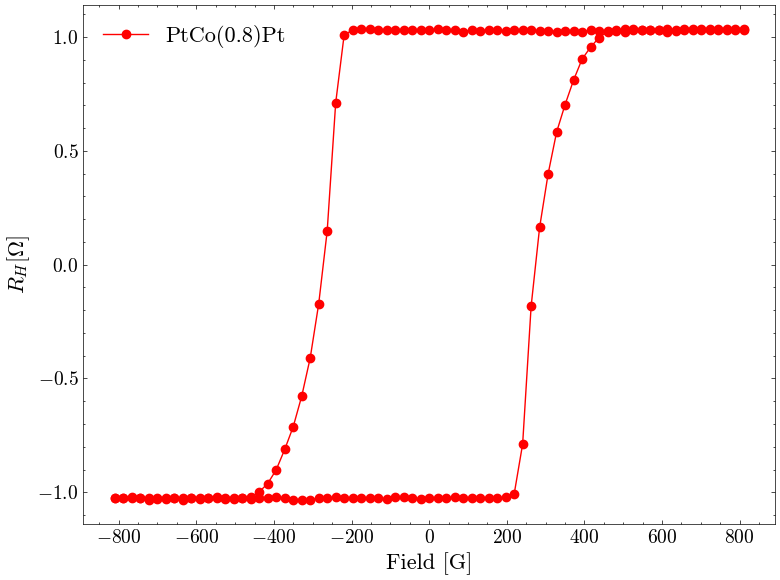

In [19]:
# Plot the data
fig, ax2 = plt.subplots(figsize=(8, 6))

ax2.plot([x*270 for x in col1_3], col2_3, 'ro-', label='PtCo(0.8)Pt')
ax2.legend(loc = 'upper left', fontsize=16)
ax2.set_ylabel('$R_H [\Omega] $', fontsize= 16)
ax2.set_xlabel('Field [G]', fontsize= 16)
ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelsize=14)

fig.tight_layout()
plt.show()

## AHE(1.0)

- x 값 : x*270 for x in co1_3
- y 값 : col3_3

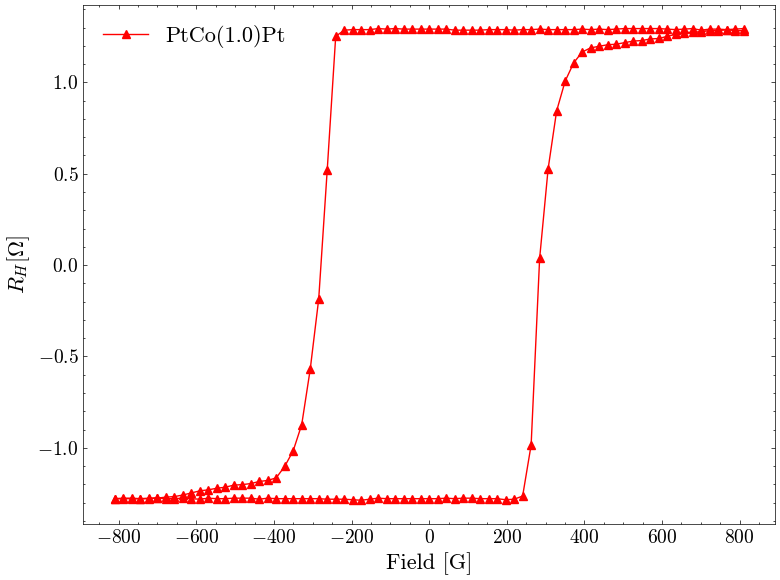

In [20]:
# Plot the data
fig, ax2 = plt.subplots(figsize=(8, 6))

ax2.plot([x*270 for x in col1_3], col3_3, 'r^-', label='PtCo(1.0)Pt')
ax2.legend(loc = 'upper left', fontsize=16)
ax2.set_ylabel('$R_H [\Omega] $', fontsize= 16)
ax2.set_xlabel('Field [G]', fontsize= 16)
ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelsize=14)

fig.tight_layout()
plt.show()

## AHE(1.2)

- x 값 : x*270 for x in col1_3
- y 값 : col4_3_reorder

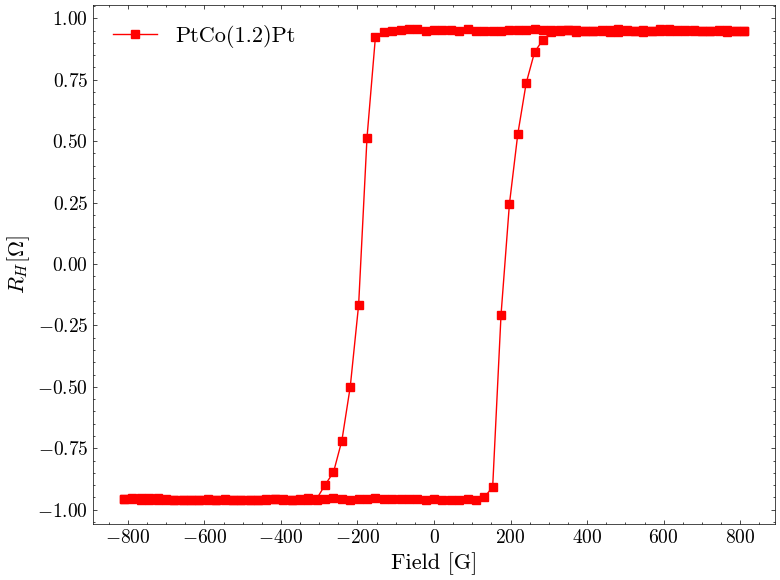

In [21]:
# Plot the data
fig, ax2 = plt.subplots(figsize=(8, 6))

ax2.plot([x*270 for x in col1_3], col4_3_reorder, 'rs-', label='PtCo(1.2)Pt')
ax2.legend(loc = 'upper left', fontsize=16)
ax2.set_ylabel('$R_H [\Omega] $', fontsize= 16)
ax2.set_xlabel('Field [G]', fontsize= 16)
ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelsize=14)

fig.tight_layout()
plt.show()

# 6. Fitting

- fitting 함수 : a * np.tanh(b * (x - c) ) + d*x + e

## 1. class

In [22]:
import numpy as np
from scipy.optimize import curve_fit, brentq
from typing import Tuple, Optional, List, Dict, Union
import matplotlib.pyplot as plt

class HysteresisAnalyzer:
    def __init__(self,
                 data: np.ndarray,
                 initial_guess: Optional[Dict[str, List[float]]] = None,
                 maxfev: int = 1000):
        """
        Initialize HysteresisAnalyzer with data and optional parameters.

        Args:
            data (np.ndarray): Input data array with shape (n, 2) where first column is x and second is y
            initial_guess (Optional[Dict[str, List[float]]]): Dictionary containing initial guesses for both halves.
                Format: {
                    'first_half': [a1, b1, c1, d1, e1],
                    'second_half': [a2, b2, c2, d2, e2]
                }
                If None, default values will be used.
            maxfev (int): Maximum number of function evaluations for curve_fit
        """
        self.data = data
        self.midpoint = len(data) // 2
        self.data_first_half = data[:self.midpoint]
        self.data_second_half = data[self.midpoint:]

        # Initialize parameters
        self.popt1 = None
        self.popt2 = None
        self.x_zero_first_half = None
        self.x_zero_second_half = None
        self.coercivity = None

        # Set maxfev
        self.maxfev = maxfev

        # Set initial guesses
        default_guess = {
            'first_half': [0, 0, 0, 0, 0],
            'second_half': [0, 0, 0, 0, 0]
        }

        if initial_guess is None:
            self.initial_guess = default_guess
        else:
            # Validate and set initial guesses
            self._validate_initial_guess(initial_guess)
            self.initial_guess = initial_guess

    def _validate_initial_guess(self, initial_guess: Dict[str, List[float]]) -> None:
        """
        Validate the initial guess dictionary.

        Args:
            initial_guess: Dictionary containing initial guesses

        Raises:
            ValueError: If the initial guess format is invalid
        """
        required_keys = {'first_half', 'second_half'}
        if not all(key in initial_guess for key in required_keys):
            raise ValueError(
                f"initial_guess must contain both 'first_half' and 'second_half' keys. "
                f"Got keys: {list(initial_guess.keys())}"
            )

        for half in required_keys:
            if not isinstance(initial_guess[half], (list, np.ndarray)):
                raise ValueError(f"initial_guess['{half}'] must be a list or numpy array")

            if len(initial_guess[half]) != 5:
                raise ValueError(
                    f"initial_guess['{half}'] must contain exactly 5 values "
                    f"[a, b, c, d, e]. Got {len(initial_guess[half])} values"
                )

    @staticmethod
    def tanh_func(x: float, a: float, b: float, c: float, d: float, e: float) -> float:
        """
        Define the tanh function.
        """
        return a * np.tanh(b * (x - c)) + d * x + e

    def fit_curves(self) -> None:
        """
        Fit both halves of the hysteresis curve.
        """
        # Split data into x and y for fitting
        x1 = self.data_first_half[:, 0]
        y1 = self.data_first_half[:, 1]
        x2 = self.data_second_half[:, 0]
        y2 = self.data_second_half[:, 1]

        # Fit both halves
        self.popt1, _ = curve_fit(
            self.tanh_func,
            x1, y1,
            p0=self.initial_guess['first_half'],
            maxfev=self.maxfev
        )
        self.popt2, _ = curve_fit(
            self.tanh_func,
            x2, y2,
            p0=self.initial_guess['second_half'],
            maxfev=self.maxfev
        )

    def find_x_for_y_zero(self, params: List[float], x_range: Tuple[float, float],
                         half: str) -> Optional[float]:
        """
        Find x value where y = 0 for given parameters and range.

        Args:
            params: List of parameters [a, b, c, d, e]
            x_range: Tuple of (min_x, max_x)
            half: String indicating which half ('first' or 'second')

        Returns:
            x value where y = 0 or None if not found
        """
        a, b, c, d, e = params
        try:
            # Check values at the boundaries
            f_min = self.tanh_func(x_range[0], a, b, c, d, e)
            f_max = self.tanh_func(x_range[1], a, b, c, d, e)
            print(f"{half} half: f({x_range[0]}) = {f_min}, f({x_range[1]}) = {f_max}")

            if f_min * f_max > 0:
                raise ValueError("The function does not cross zero in the given interval.")

            return brentq(lambda x: self.tanh_func(x, a, b, c, d, e),
                         x_range[0], x_range[1])
        except ValueError as e:
            print(f"{half} half: {e}")
            return None

    def calculate_zero_crossings(self) -> None:
        """
        Calculate zero crossings for both halves of the curve.
        """
        if self.popt1 is None or self.popt2 is None:
            raise ValueError("Must run fit_curves() before calculating zero crossings")

        x_range1 = (self.data_first_half[:, 0].min(), self.data_first_half[:, 0].max())
        x_range2 = (self.data_second_half[:, 0].min(), self.data_second_half[:, 0].max())

        self.x_zero_first_half = self.find_x_for_y_zero(self.popt1, x_range1, "First")
        self.x_zero_second_half = self.find_x_for_y_zero(self.popt2, x_range2, "Second")

    def calculate_coercivity(self) -> None:
        """
        Calculate coercivity from zero crossings.
        """
        if self.x_zero_first_half is not None:
            self.coercivity = (abs(float(self.x_zero_first_half)) +
                             float(self.x_zero_first_half)) / 2

    def analyze(self) -> dict:
        """
        Perform complete analysis and return results.

        Returns:
            Dictionary containing all analysis results
        """
        self.fit_curves()
        self.calculate_zero_crossings()
        self.calculate_coercivity()

        return {
            'first_half_parameters': {
                'a': self.popt1[0],
                'b': self.popt1[1],
                'c': self.popt1[2],
                'd': self.popt1[3],
                'e': self.popt1[4]
            },
            'second_half_parameters': {
                'a': self.popt2[0],
                'b': self.popt2[1],
                'c': self.popt2[2],
                'd': self.popt2[3],
                'e': self.popt2[4]
            },
            'x_zero_first_half': self.x_zero_first_half,
            'x_zero_second_half': self.x_zero_second_half,
            'coercivity': self.coercivity
        }

    def get_fitted_points(self, x_points: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """
        Get fitted y values for given x points.

        Args:
            x_points: Array of x values to evaluate

        Returns:
            Tuple of (first_half_y_values, second_half_y_values)
        """
        if self.popt1 is None or self.popt2 is None:
            raise ValueError("Must run fit_curves() before getting fitted points")

        y1 = self.tanh_func(x_points, *self.popt1)
        y2 = self.tanh_func(x_points, *self.popt2)
        return y1, y2

    def plot_results(self, figsize=(10, 6), save_path=None):
        """
        Plot the original data and fitted curves.

        Args:
            figsize: Tuple of figure dimensions (width, height)
            save_path: Optional path to save the plot
        """
        if self.popt1 is None or self.popt2 is None:
            raise ValueError("Must run fit_curves() before plotting")

        plt.figure(figsize=figsize)

        # Plot original data
        plt.scatter(self.data_first_half[:, 0], self.data_first_half[:, 1],  color='blue', alpha=0.5, label='First Half Data')
        plt.scatter(self.data_second_half[:, 0], self.data_second_half[:, 1], color='red', alpha=0.5, label='Second Half Data')

        # Generate points for fitted curves
        x_fit = np.linspace(self.data[:, 0].min(), self.data[:, 0].max(), 1000)
        y1_fit, y2_fit = self.get_fitted_points(x_fit)

        # Plot fitted curves
        plt.plot(x_fit, y1_fit, 'b-', label='First Half Fit')
        plt.plot(x_fit, y2_fit, 'r-', label='Second Half Fit')

        # Plot zero crossings if available
        if self.x_zero_first_half is not None:
            plt.scatter(self.x_zero_first_half, 0, c='green', marker='x', s=100,
                       label='First Zero Crossing')
        if self.x_zero_second_half is not None:
            plt.scatter(self.x_zero_second_half, 0, c='orange', marker='x', s=100,
                       label='Second Zero Crossing')

        # Add grid and labels
        plt.grid(True, alpha=0.3)
        plt.xlabel('Field (A)')
        plt.ylabel('Moment (emu)')
        plt.title('Hysteresis Analysis')
        plt.legend()

        # Save plot if path is provided
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')

        plt.show()

## 2. Example (MOKE)

### 2-1. MOKE(0.8)

First half: f(-2.0) = 0.00018693821019586933, f(2.0) = 0.00042320314401490133
First half: The function does not cross zero in the given interval.
Second half: f(-2.0) = -0.000532840904515817, f(2.0) = 0.0002451317173220505


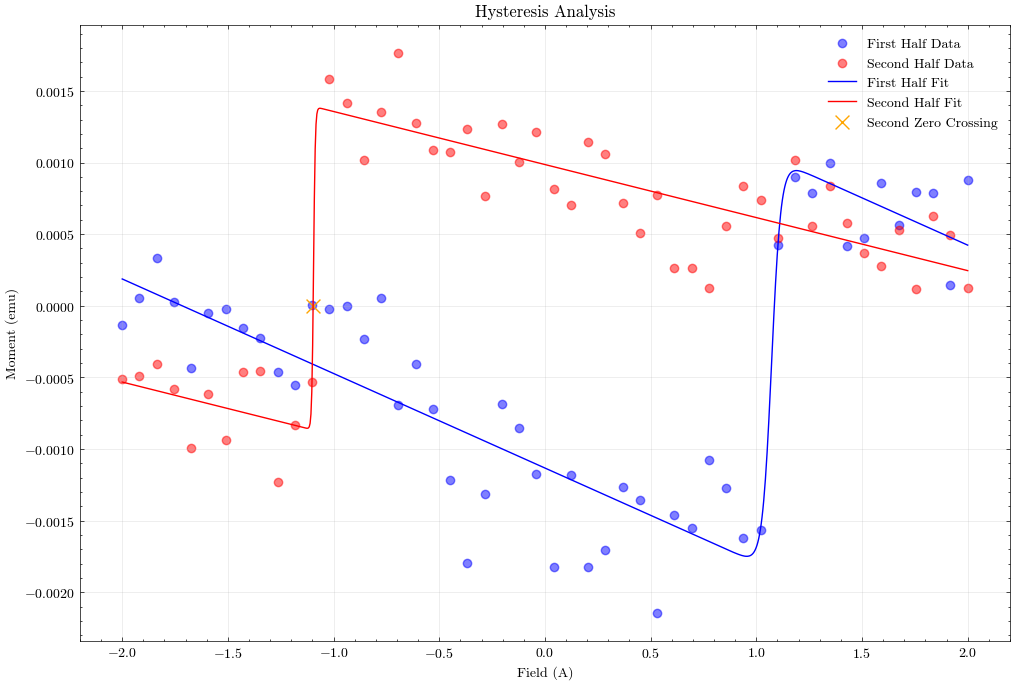

Analysis Results:
First half fit parameters: {'a': -0.0014388962791228015, 'b': -22.44970998166461, 'c': 1.0721671988630819, 'd': -0.0006603819061066428, 'e': 0.00030507067710538533}
Second half fit parameters: {'a': -0.001129666849592079, 'b': -122.44114636606938, 'c': -1.0948494081161748, 'd': -0.00037034026933657267, 'e': -0.00014385459359688327}
First half x for y=0: None
Second half x for y=0: -1.0967812046380405
Coercivity: None


In [23]:
# 사용자 정의 초기값 설정 (선택사항)
custom_initial_guess = {
    'first_half': [0.01, 1, 0.8, 0, -0.001],
    'second_half': [0.014, -1, -0.8, 0, 0.001]
}

'''
# 기본 초기값 사용
analyzer1 = HysteresisAnalyzer(data)
'''

# data 입력
# 사용자 정의 초기값 사용
analyzer2 = HysteresisAnalyzer(PMA_8, initial_guess = custom_initial_guess)

# 분석 수행 및 결과 플롯
results = analyzer2.analyze()
analyzer2.plot_results(figsize=(12, 8))

# 결과 출력
print("Analysis Results:")
print(f"First half fit parameters:", results['first_half_parameters'])
print(f"Second half fit parameters:", results['second_half_parameters'])
print(f"First half x for y=0:", results['x_zero_first_half'])
print(f"Second half x for y=0:", results['x_zero_second_half'])
print(f"Coercivity:", results['coercivity'])

### 2-2. MOKE(1.0)

First half: f(-2.0) = -0.0028329979530129345, f(2.0) = 0.0037077102399548974
Second half: f(-2.0) = -0.00354156614022028, f(2.0) = 0.003804926447991623


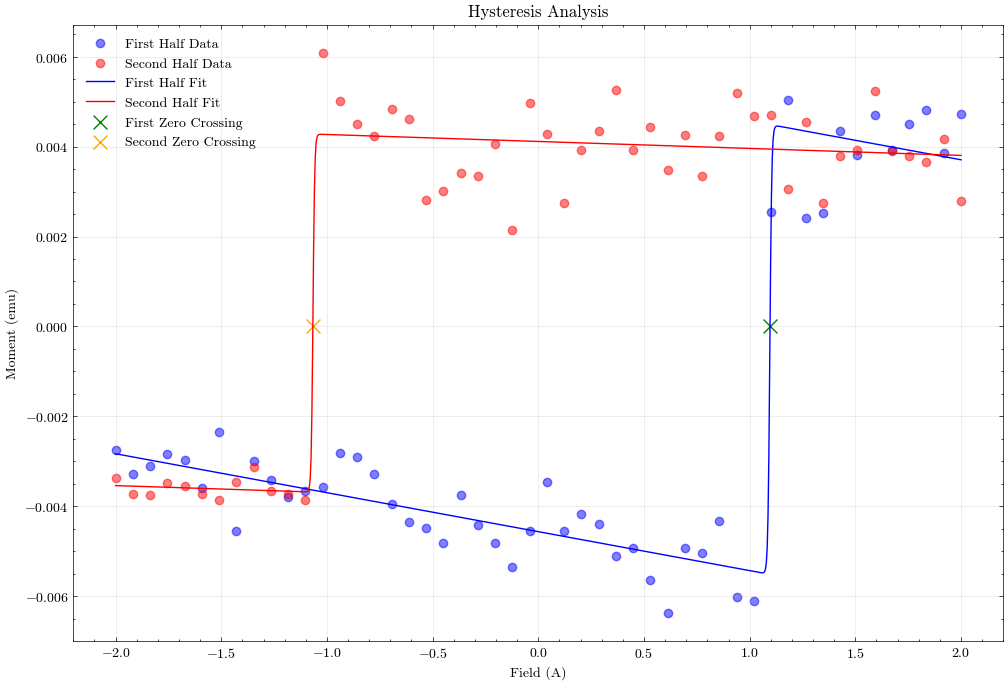

Analysis Results:
First half fit parameters: {'a': 0.005004594527553447, 'b': 110.84472190995395, 'c': 1.095606038562388, 'd': -0.0008671202155347657, 'e': 0.00043735614347098164}
Second half fit parameters: {'a': -0.00398365575256247, 'b': -123.80833544255957, 'c': -1.0659405909808588, 'd': -0.00015520472922825917, 'e': 0.00013168015388567166}
First half x for y=0: 1.0965349264390523
Second half x for y=0: -1.06654432229008
Coercivity: 1.0965349264390523


In [24]:
# 사용자 정의 초기값 설정 (선택사항)
custom_initial_guess = {
    'first_half': [0.01, 1, 0.8, 0, -0.001],
    'second_half': [0.014, -1, -0.8, 0, 0.001]
}

'''
# 기본 초기값 사용
analyzer1 = HysteresisAnalyzer(data)
'''

# data 입력
# 사용자 정의 초기값 사용
analyzer2 = HysteresisAnalyzer(PMA_10, initial_guess = custom_initial_guess)

# 분석 수행 및 결과 플롯
results = analyzer2.analyze()
analyzer2.plot_results(figsize=(12, 8))

# 결과 출력
print("Analysis Results:")
print(f"First half fit parameters:", results['first_half_parameters'])
print(f"Second half fit parameters:", results['second_half_parameters'])
print(f"First half x for y=0:", results['x_zero_first_half'])
print(f"Second half x for y=0:", results['x_zero_second_half'])
print(f"Coercivity:", results['coercivity'])

### 2-3. MOKE(1.2)

First half: f(-2.0) = -0.00041958295932847874, f(2.0) = 0.0006056200038683348
Second half: f(-2.0) = -0.0007104388660940527, f(2.0) = 0.0007545906821550554


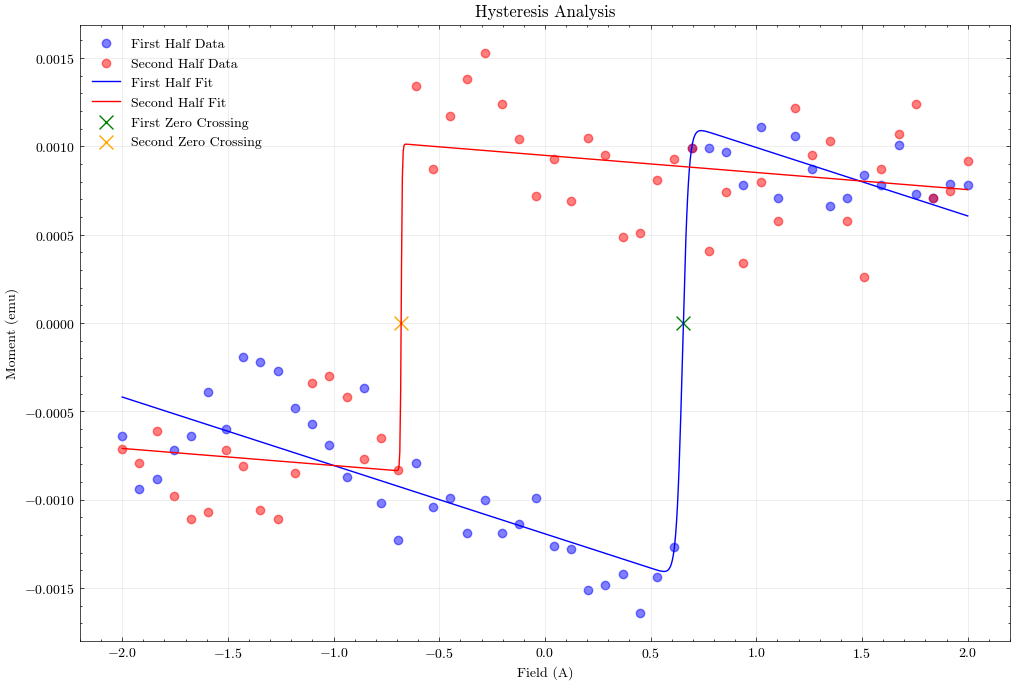

Analysis Results:
First half fit parameters: {'a': 0.0012874062609178419, 'b': 34.92541423102086, 'c': 0.6510489607693186, 'd': -0.00038740238965971754, 'e': 9.301852226992803e-05}
Second half fit parameters: {'a': -0.0009262646870802745, 'b': -205.04823551162892, 'c': -0.679903014722852, 'd': -9.687495647786023e-05, 'e': 2.207590803050136e-05}
First half x for y=0: 0.6546392543375443
Second half x for y=0: -0.6803676757686133
Coercivity: 0.6546392543375443


In [25]:
# 사용자 정의 초기값 설정 (선택사항)
custom_initial_guess = {
    'first_half': [0.01, 1, 0.8, 0, -0.001],
    'second_half': [0.014, -1, -0.8, 0, 0.001]
}

'''
# 기본 초기값 사용
analyzer1 = HysteresisAnalyzer(data)
'''

# data 입력
# 사용자 정의 초기값 사용
analyzer2 = HysteresisAnalyzer(PMA_12, initial_guess = custom_initial_guess)

# 분석 수행 및 결과 플롯
results = analyzer2.analyze()
analyzer2.plot_results(figsize=(12, 8))

# 결과 출력
print("Analysis Results:")
print(f"First half fit parameters:", results['first_half_parameters'])
print(f"Second half fit parameters:", results['second_half_parameters'])
print(f"First half x for y=0:", results['x_zero_first_half'])
print(f"Second half x for y=0:", results['x_zero_second_half'])
print(f"Coercivity:", results['coercivity'])

# 7. fitting - Linear fitting

## PtCo(0.8)Pt

### data 처리

In [36]:
data_8 = PMA_8

midpoint = len(data_8) // 2
data_first_half = data_8[:midpoint]
data_second_half = data_8[midpoint:]

x1_8 = data_first_half[:, 0]
x2_8 = data_second_half[:, 0]

y1_8 = data_first_half[:, 1]
y2_8 = data_second_half[:, 1]

In [37]:
custom_initial_guess = {
    'first_half': [0.01, 1, 0.8, 0, -0.001],
    'second_half': [0.014, -1, -0.8, 0, 0.001]
}

# 사용자 정의 초기값 사용
analyzer2 = HysteresisAnalyzer(data_8, initial_guess = custom_initial_guess)

# 분석 수행 및 결과 플롯
results = analyzer2.analyze()

first_parameters = results['first_half_parameters']
second_parameters = results['second_half_parameters']

d1 = first_parameters['d']
d2 = second_parameters['d']

e1 = first_parameters['e']
e2 = second_parameters['e']

First half: f(-2.0) = 0.00018693821019586933, f(2.0) = 0.00042320314401490133
First half: The function does not cross zero in the given interval.
Second half: f(-2.0) = -0.000532840904515817, f(2.0) = 0.0002451317173220505


In [38]:
# 선형 부분 빼기
y1_fit_linear_8=[]
y2_fit_linear_8=[]

for i in range(len(x1_8)):
  y1_fit_linear_8.append( y1_8[i] - ( d1 * x1_8[i] + e1) )

for i in range(len(x1_8)):
  y2_fit_linear_8.append(y2_8[i] - ( d2 * x2_8[i] + e1) )

### plot

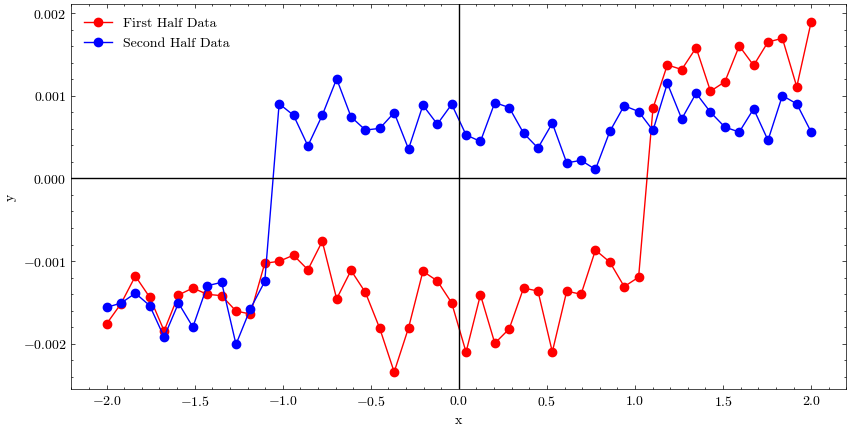

In [39]:
# data plot
plt.figure(figsize=(10, 5))
plt.plot(x1_8, y1_fit_linear_8 ,'ro-', label='First Half Data')
plt.plot(x2_8, y2_fit_linear_8, 'bo-', label='Second Half Data')

plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

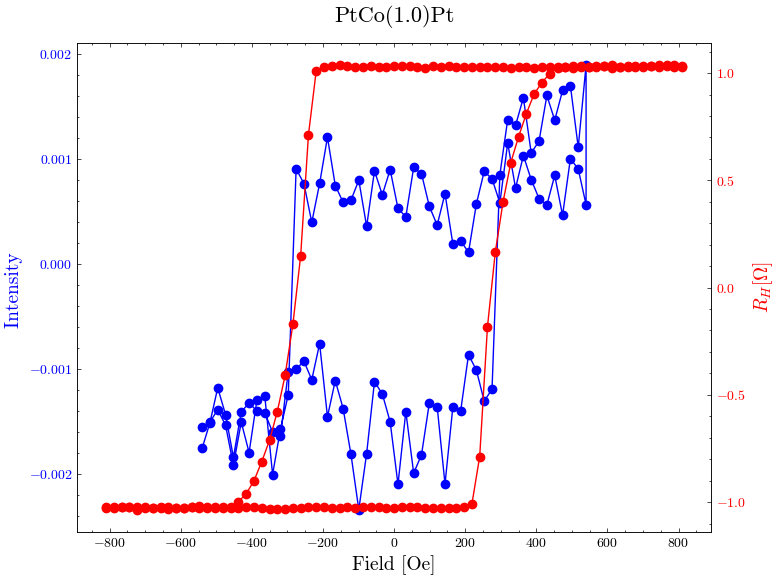

In [40]:
x_combined_8 = [x * 270 for x in x1_8] + [x * 270 for x in x2_8]
y_combined_8 = list(y1_fit_linear_8) + list(y2_fit_linear_8)

# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE with scaled x-axis
ax1.plot(x_combined_8, y_combined_8 ,'bo-', label='MOKE')
ax1.set_xlabel('Field [Oe]', fontsize= 14)  # Changed unit to Oe since we multiplied by 90
ax1.set_ylabel('Intensity ', color='blue', fontsize= 14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for AHE with scaled x-axis
ax2 = ax1.twinx()
ax2.plot([x * 270 for x in col1_3], col2_3, 'ro-', label='AHE')
ax2.set_ylabel('$R_H [\Omega]$', color='red', fontsize= 14)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and show the plot
plt.title('PtCo(1.0)Pt', fontsize= 16, pad=15)
fig.tight_layout()
plt.show()

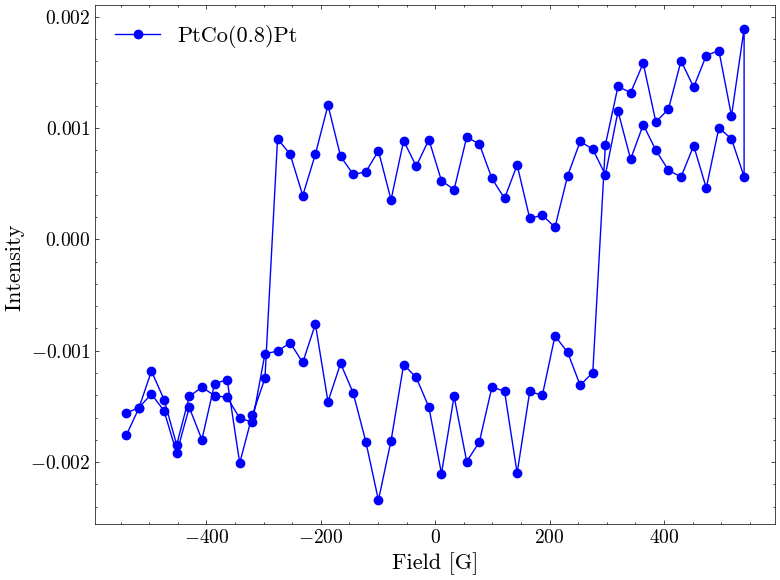

In [41]:
x_combined_8 = [x * 270 for x in x1_8] + [x * 270 for x in x2_8]
y_combined_8 = list(y1_fit_linear_8) + list(y2_fit_linear_8)

# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE with scaled x-axis
ax1.plot(x_combined_8, y_combined_8 ,'bo-', label='PtCo(0.8)Pt')
ax1.legend(loc = 'upper left', fontsize=16)
ax1.set_xlabel('Field [G]', fontsize= 16)  # Changed unit to Oe since we multiplied by 90
ax1.set_ylabel('Intensity ', fontsize= 16)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

# Add title and show the plot
fig.tight_layout()
plt.show()

## PtCo(1.0)Pt

### data 처리

In [42]:
data_10 = PMA_10

midpoint = len(data_10) // 2
data_first_half = data_10[:midpoint]
data_second_half = data_10[midpoint:]

x1_10 = data_first_half[:, 0]
x2_10 = data_second_half[:, 0]

y1_10 = data_first_half[:, 1]
y2_10 = data_second_half[:, 1]

In [43]:
custom_initial_guess = {
    'first_half': [0.01, 1, 0.8, 0, -0.001],
    'second_half': [0.014, -1, -0.8, 0, 0.001]
}

# 사용자 정의 초기값 사용
analyzer2 = HysteresisAnalyzer(PMA_10, initial_guess = custom_initial_guess)

# 분석 수행 및 결과 플롯
results = analyzer2.analyze()

first_parameters = results['first_half_parameters']
second_parameters = results['second_half_parameters']

d1 = first_parameters['d']
d2 = second_parameters['d']

e1 = first_parameters['e']
e2 = second_parameters['e']

First half: f(-2.0) = -0.0028329979530129345, f(2.0) = 0.0037077102399548974
Second half: f(-2.0) = -0.00354156614022028, f(2.0) = 0.003804926447991623


In [45]:
# 선형 부분 빼기
y1_fit_linear_10=[]
y2_fit_linear_10=[]

for i in range(len(x1_10)):
  y1_fit_linear_10.append( y1_10[i] - ( d1 * x1_10[i] + e1) )

for i in range(len(x1_10)):
  y2_fit_linear_10.append(y2_10[i] - ( d2 * x2_10[i] + e1) )

### plot

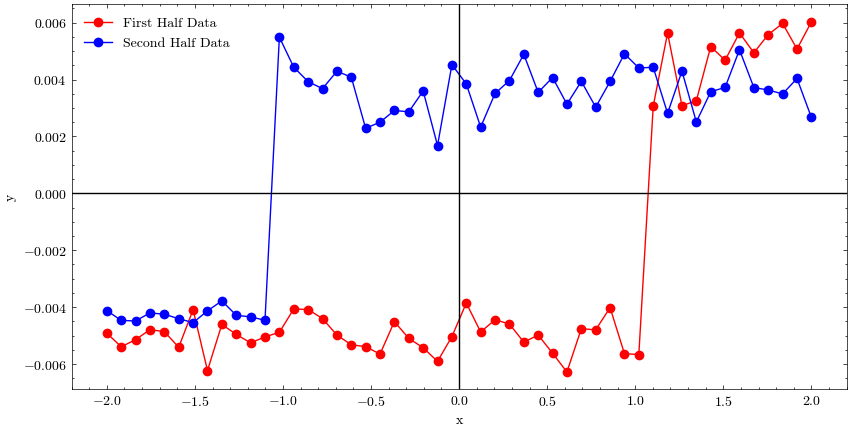

In [46]:
# data plot
plt.figure(figsize=(10, 5))
plt.plot(x1_10, y1_fit_linear_10 ,'ro-', label='First Half Data')
plt.plot(x2_10, y2_fit_linear_10, 'bo-', label='Second Half Data')

plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

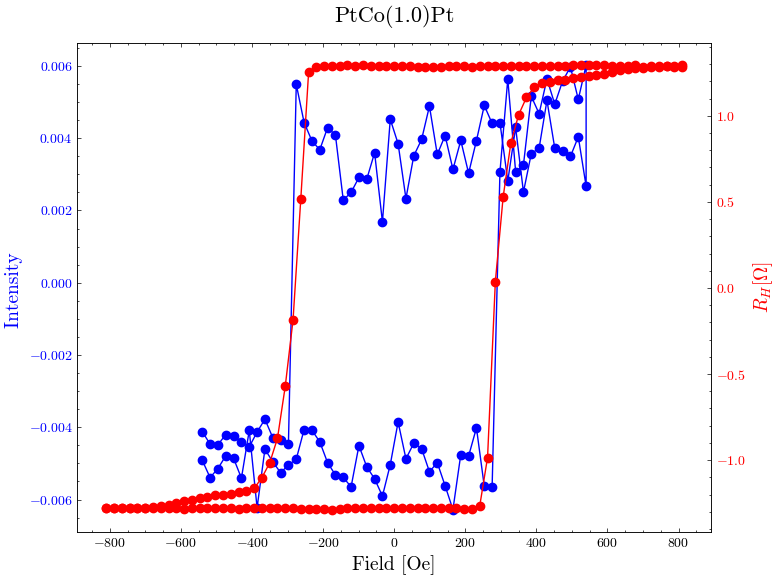

In [47]:
# array 합치기
x_combined_10 = [x * 270 for x in x1_10] + [x * 270 for x in x2_10]
y_combined_10 = list(y1_fit_linear_10) + list(y2_fit_linear_10)

# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE with scaled x-axis
ax1.plot(x_combined_10, y_combined_10 ,'bo-', label='MOKE')
ax1.set_xlabel('Field [Oe]', fontsize= 14)  # Changed unit to Oe since we multiplied by 90
ax1.set_ylabel('Intensity ', color='blue', fontsize= 14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for AHE with scaled x-axis
ax2 = ax1.twinx()
ax2.plot([x * 270 for x in col1_3], col3_3, 'ro-', label='AHE')
ax2.set_ylabel('$R_H [\Omega]$', color='red', fontsize= 14)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and show the plot
plt.title('PtCo(1.0)Pt', fontsize= 16, pad=15)
fig.tight_layout()
plt.show()

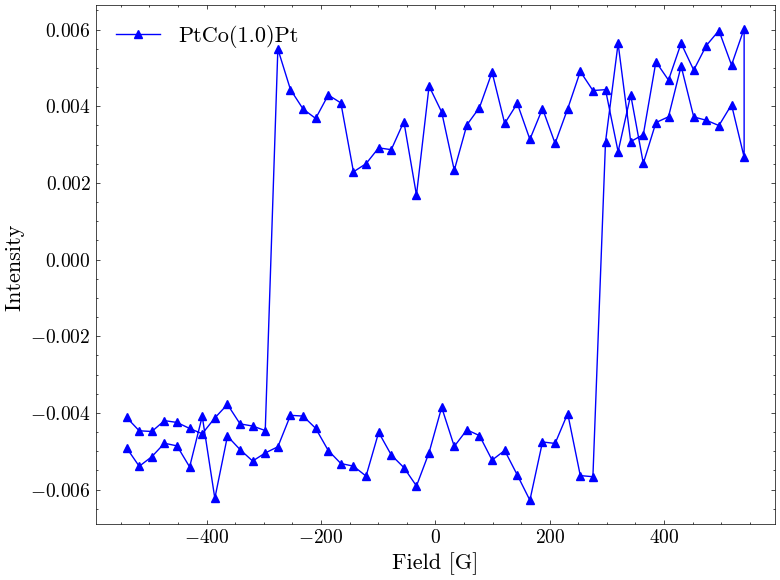

In [48]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE with scaled x-axis
ax1.plot(x_combined_10, y_combined_10 ,'b^-', label='PtCo(1.0)Pt')
ax1.legend(loc = 'upper left', fontsize=16)
ax1.set_xlabel('Field [G]', fontsize= 16)  # Changed unit to Oe since we multiplied by 90
ax1.set_ylabel('Intensity ',  fontsize= 16)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

# Add title and show the plot
fig.tight_layout()
plt.show()

## PtCo(1.2)Pt

### data 처리

In [53]:
data_12 = PMA_12

midpoint = len(data_12) // 2
data_first_half = data_12[:midpoint]
data_second_half = data_12[midpoint:]

x1_12 = data_first_half[:, 0]
x2_12 = data_second_half[:, 0]

y1_12 = data_first_half[:, 1]
y2_12 = data_second_half[:, 1]

In [54]:
custom_initial_guess = {
    'first_half': [0.01, 1, 0.8, 0, -0.001],
    'second_half': [0.014, -1, -0.8, 0, 0.001]
}

# 사용자 정의 초기값 사용
analyzer2 = HysteresisAnalyzer(data_12, initial_guess = custom_initial_guess)

# 분석 수행 및 결과 플롯
results = analyzer2.analyze()

first_parameters = results['first_half_parameters']
second_parameters = results['second_half_parameters']

d1 = first_parameters['d']
d2 = second_parameters['d']

e1 = first_parameters['e']
e2 = second_parameters['e']

First half: f(-2.0) = -0.00041958295932847874, f(2.0) = 0.0006056200038683348
Second half: f(-2.0) = -0.0007104388660940527, f(2.0) = 0.0007545906821550554


In [55]:
# 선형 부분 빼기
y1_fit_linear_12=[]
y2_fit_linear_12=[]

for i in range(len(x1_12)):
  y1_fit_linear_12.append( y1_12[i] - ( d1 * x1_12[i] + e1) )

for i in range(len(x1_12)):
  y2_fit_linear_12.append(y2_12[i] - ( d2 * x2_12[i] + e1) )

### plot

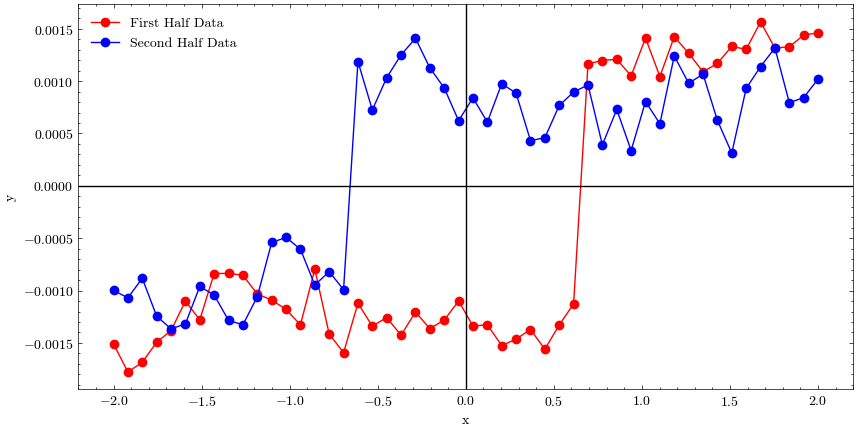

In [57]:
# data plot
plt.figure(figsize=(10, 5))
plt.plot(x1_12, y1_fit_linear_12 ,'ro-', label='First Half Data')
plt.plot(x2_12, y2_fit_linear_12, 'bo-', label='Second Half Data')

plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

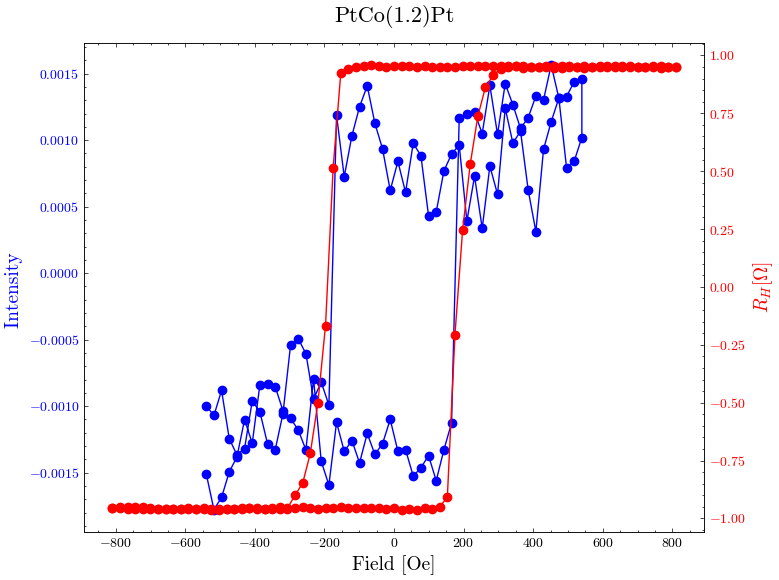

In [58]:
# 데이터 합치기
x_combined = [x * 270 for x in x1_12] + [x * 270 for x in x2_12]
y_combined = list(y1_fit_linear_12) + list(y2_fit_linear_12)

# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE with scaled x-axis
ax1.plot(x_combined, y_combined ,'bo-', label='MOKE')
ax1.set_xlabel('Field [Oe]', fontsize= 14)  # Changed unit to Oe since we multiplied by 90
ax1.set_ylabel('Intensity ', color='blue', fontsize= 14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for AHE with scaled x-axis
ax2 = ax1.twinx()
ax2.plot([x * 270 for x in col1_3], col4_3_reorder, 'ro-', label='AHE')
ax2.set_ylabel('$R_H [\Omega]$', color='red', fontsize= 14)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and show the plot
plt.title('PtCo(1.2)Pt', fontsize= 16, pad=15)
fig.tight_layout()
plt.show()

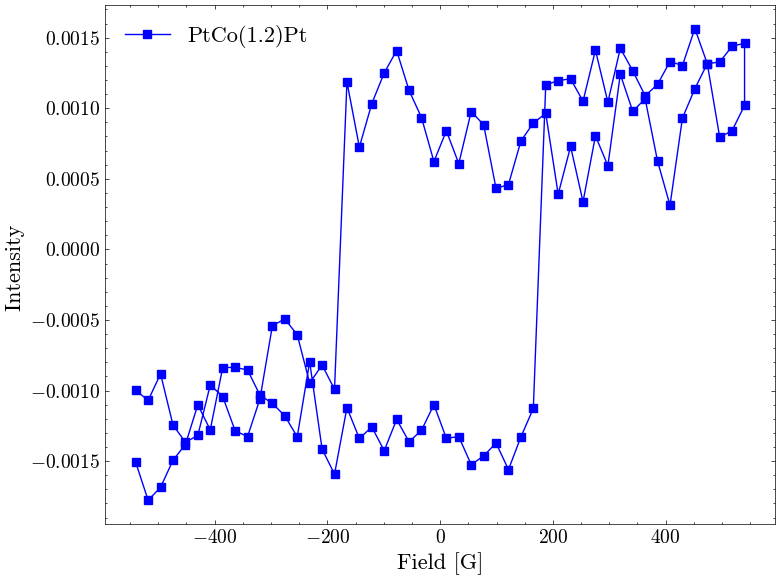

In [59]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot for MOKE with scaled x-axis
ax1.plot(x_combined, y_combined ,'bs-', label='PtCo(1.2)Pt')
ax1.legend(loc = 'upper left', fontsize=16)
ax1.set_xlabel('Field [G]', fontsize= 16)  # Changed unit to Oe since we multiplied by 90
ax1.set_ylabel('Intensity ',  fontsize= 16)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

# Add title and show the plot
fig.tight_layout()
plt.show()